In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Optional: make plots look nicer
sns.set(style='whitegrid')
%matplotlib inline


In [6]:
df = pd.read_csv(r"C:\Users\My Lappy\Downloads\Beauty_Product_Sales_June2024_June2025.csv")



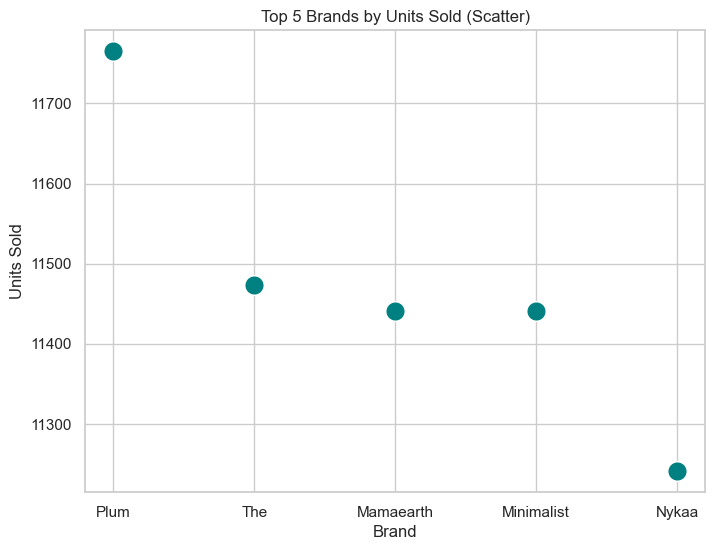

In [17]:
top_5 = df.groupby('Brand')['Units Sold'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=top_5, x='Brand', y='Units Sold', s=200, color='teal')
plt.title("Top 5 Brands by Units Sold (Scatter)")
plt.xlabel("Brand")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()

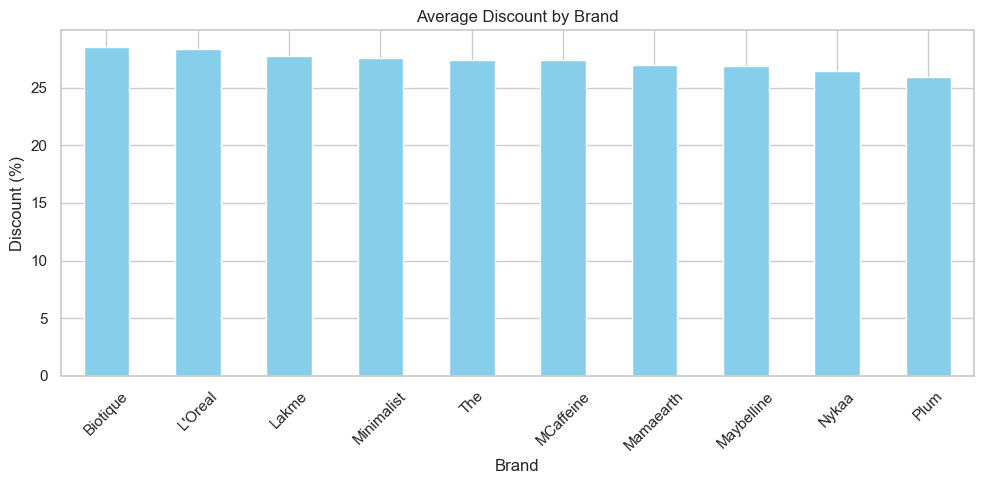

In [8]:
avg_discount = df.groupby('Brand')['Discount (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
avg_discount.plot(kind='bar', color='skyblue')
plt.title("Average Discount by Brand")
plt.ylabel("Discount (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


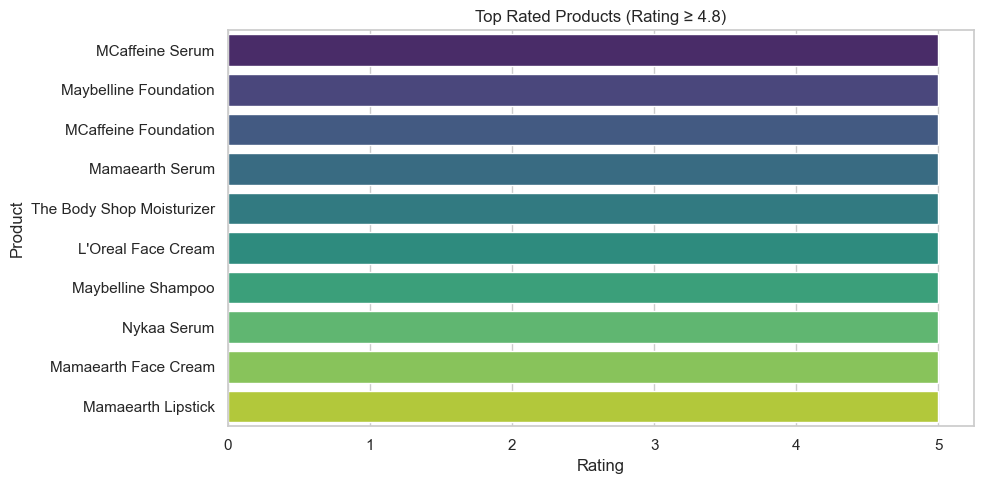

In [10]:
top_rated = df[(df['Rating'] >= 4.8) & (df['Rating Count'] > 100)]
top_rated_sorted = top_rated[['Product', 'Rating']].drop_duplicates().sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='Rating', y='Product', data=top_rated_sorted, hue='Product', dodge=False, legend=False, palette='viridis')
plt.title("Top Rated Products (Rating ≥ 4.8)")
plt.xlabel("Rating")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


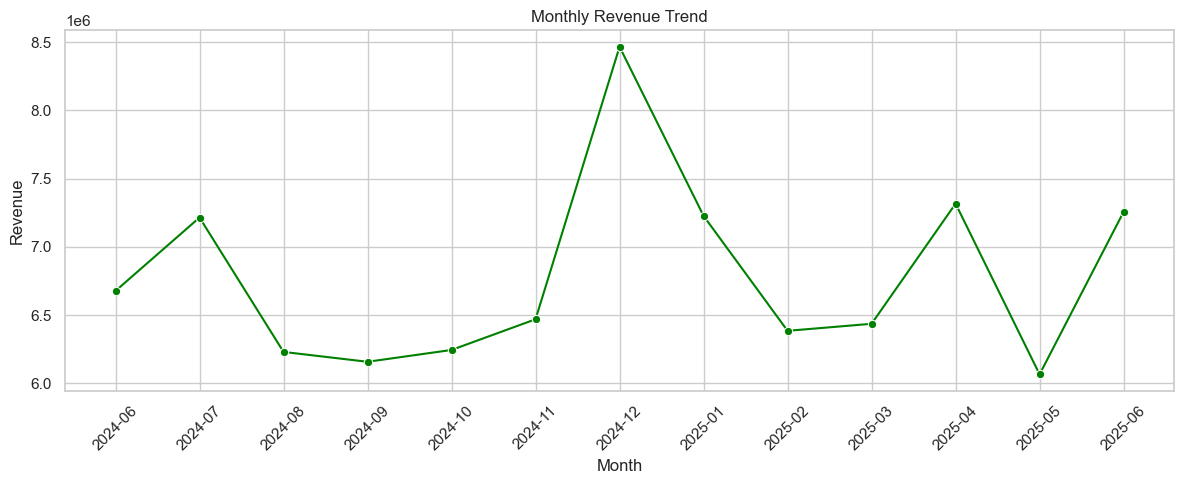

In [11]:
df['Revenue'] = df['Price'] * df['Units Sold']
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o', color='green')
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


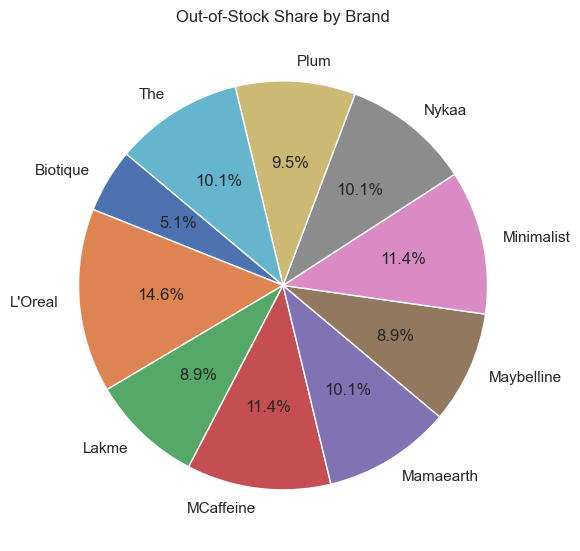

In [14]:
out_of_stock = df[df['Stock Status'] == 'Out of Stock'].groupby('Brand').size()
out_of_stock.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6,6))
plt.title("Out-of-Stock Share by Brand")
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.show()



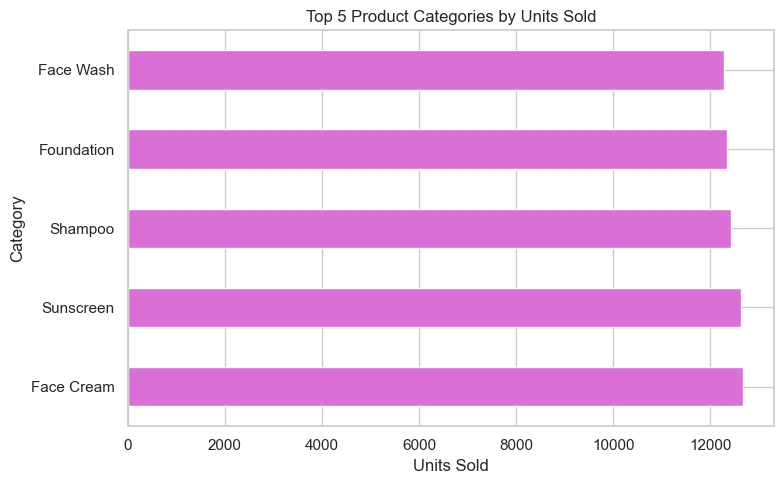

In [13]:
top_categories = df.groupby('Category')['Units Sold'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top_categories.plot(kind='barh', color='orchid')
plt.title("Top 5 Product Categories by Units Sold")
plt.xlabel("Units Sold")
plt.tight_layout()
plt.show()
